## Plot of Year and Location of Collected Specimen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import *species*, *location* and *collection date* values for the collection date-labeled specimen in [sample_origins.csv](../../data/metadata/sample_origins.csv).

In [2]:
file_path = "../../data/metadata/sample_origins.csv"
metadata_file = pd.read_csv(file_path, sep=";")
specimen_df = metadata_file[metadata_file["COLLECTION_DATE"].notna()][["ORGANISM","COUNTRY","COLLECTION_DATE"]]

specimen_df.head()

,ORGANISM,COUNTRY,COLLECTION_DATE
0,Goura victoria,"Indonesia: Biak Island, Geelvink Bay",1896.0
1,Goura victoria,"Papua New Guinea: Utai, Bewani Mountains",1966.0
2,Goura victoria,Papua New Guinea: Ambunti,1966.0
3,Goura sclaterii,"Indonesia: Cape Steenboon, Carstenz range",1971.0
4,Goura victoria,Indonesia: Bernhard Camp (along Idenburg River),1939.0


Sort locations according to the following six overall categories:
- Papua New Guinea
- Indonesian New Guinea
    - Arfak Mountains
    - Bernhard Camp
    - Brazza River
    - Carstenz Range
    - Etna Bay
    - Humboldt Bay
    - Triton Bay
    - Mamberamo River
    - Mimika River
    - Okaba
    - Rubi (Irubi)
    - Utakwa (Otakwa)
    - Wonti
- Geelvink Bay Islands
    - Biak Island
    - Kordo (Korido)
    - Yapen Island
- Raja Ampat Islands
    - Misool Island
    - Waigeo Island
- Borneo
- Samoa

In [3]:
# Function to refine country and island categories
def refine_country_and_island_categories(location):
    indonesian_new_guinea_locations = ["Arfak",
                                   "Bernhard",
                                   "Brazza",
                                   "Carstenz",
                                   "Etna",
                                   "Humboldt",
                                   "Triton",
                                   "Mamberamo",
                                   "Mimika",
                                   "Okaba",
                                   "Rubi",
                                   "Utakwa",
                                   "Wonti"]
    geelvink_bay_islands = ["Biak",
                        "Kordo",
                        "Yapen"]
    raja_ampat_islands = ["Misool",
                        "Waigeo"]

    country, specific_location = location.split(":")
    specific_location = specific_location.strip()

    if country == "Indonesia":
        if any(word in specific_location for word in indonesian_new_guinea_locations):
            return "Indonesian New Guinea"
        elif any(word in specific_location for word in geelvink_bay_islands):
            return "Geelvink Bay Islands"
        elif any(word in specific_location for word in raja_ampat_islands):
            return "Raja Ampat Islands"
        elif "Borneo" in specific_location:
            return "Borneo"
        else:
            return "Other"
    else:
        return country

In [4]:
# Apply the function to categorize locations
specimen_df["REFINED_LOCATION"] = specimen_df["COUNTRY"].apply(refine_country_and_island_categories)

specimen_df.head()

,ORGANISM,COUNTRY,COLLECTION_DATE,REFINED_LOCATION
0,Goura victoria,"Indonesia: Biak Island, Geelvink Bay",1896.0,Geelvink Bay Islands
1,Goura victoria,"Papua New Guinea: Utai, Bewani Mountains",1966.0,Papua New Guinea
2,Goura victoria,Papua New Guinea: Ambunti,1966.0,Papua New Guinea
3,Goura sclaterii,"Indonesia: Cape Steenboon, Carstenz range",1971.0,Indonesian New Guinea
4,Goura victoria,Indonesia: Bernhard Camp (along Idenburg River),1939.0,Indonesian New Guinea


Plot specimen according to collection date, species, and sampling location.

/home/laniel/miniforge3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Bird Specimen Collection by Year and Location')

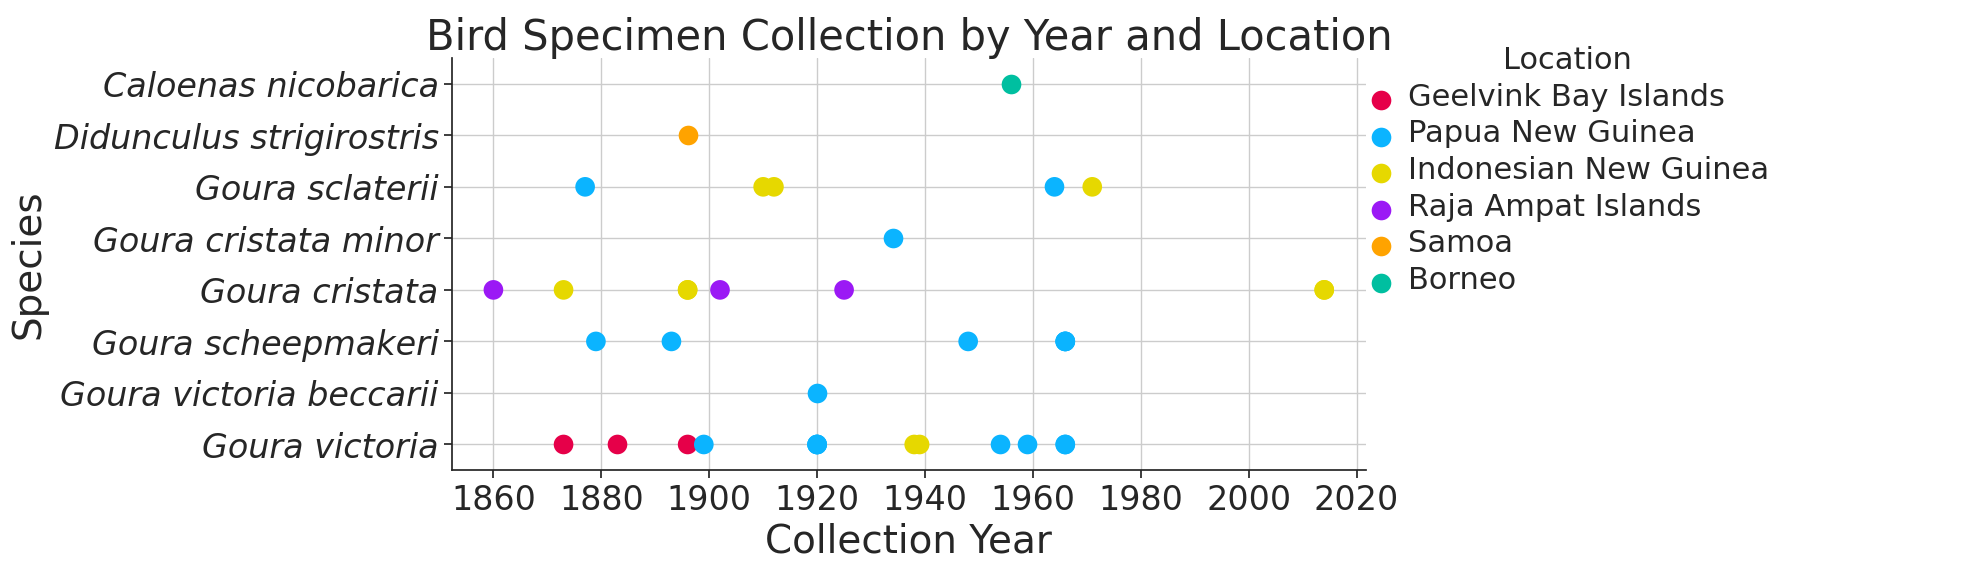

In [5]:
# Creating scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
# Custom color palette
color_palette = ["#e60049", "#0bb4ff", "#e6d800",
                 "#9b19f5", "#ffa300", "#00bfa0"]

# The order the species should be presented in
species_order = ["Caloenas nicobarica", "Didunculus strigirostris",
                  "Goura sclaterii", "Goura cristata minor", "Goura cristata",
                    "Goura scheepmakeri", "Goura victoria beccarii",
                      "Goura victoria"]

sns.set(style="ticks")
catplot = sns.catplot(data=specimen_df, x="COLLECTION_DATE", y="ORGANISM",
             order=species_order, hue="REFINED_LOCATION", aspect=2.5, s=200,
               jitter=False, palette=color_palette)
plt.setp(catplot._legend.get_texts(), fontsize=22)
catplot.fig.subplots_adjust(right=0.8)
catplot._legend.set_bbox_to_anchor((1.2,0.8))
catplot._legend.set_title("Location")
catplot._legend.get_title().set_fontsize("22")

plt.grid()
plt.xlabel("Collection Year", fontsize=28)
plt.ylabel("Species", fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24, style='italic')
plt.title("Bird Specimen Collection by Year and Location", fontsize=30)

Save the figure to the '__results/figures/__' directory.

In [6]:
catplot.savefig("../../results/figures/specimen_by_year_location.png", bbox_inches="tight")